In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
trainDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d01\\df_train_cbMSIn0d014nonInDI_STDnorm.csv")
extDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d01\\df_ext_cbMSIn0d014nonInDI_STDnorm.csv")
ingestedDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d01\\df_ingested_cbMSIn0d014nonInDI_STDnorm.csv")
fnaDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d01\\df_FNA_cbMSIn0d014nonInDI_STDnorm.csv")
diDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d01\\df_nonInDI_cbMSIn0d014nonInDI_STDnorm.csv")

In [3]:
trainDEFSDf.describe()

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,...,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5,type
count,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,...,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,90960.000000
mean,1.396930e-13,3.163835e-13,2.491776e-14,-1.104589e-15,1.329619e-14,2.863713e-15,-1.665599e-13,-1.040421e-13,-3.752540e-14,4.477810e-14,...,-6.779603e-14,1.081596e-13,1.639329e-14,2.585340e-15,-4.082209e-14,6.743769e-15,2.632561e-14,1.023015e-13,9.412199e-14,0.478353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499534
min,-1.116645e+00,-1.034945e+00,-6.809713e-01,-4.025961e+00,-1.829692e+00,-2.906735e+00,-4.024949e-01,-1.168297e+00,-4.409279e-01,-6.999087e-01,...,-1.233713e+00,-1.195292e+00,-6.279986e-02,-3.313856e+00,-7.352094e-01,-2.722254e+00,-5.445464e-01,-2.532634e-01,-9.325303e-01,0.000000
25%,-1.116645e+00,-1.034945e+00,-6.809713e-01,-6.737343e-01,-1.862615e-01,-6.586511e-01,-4.024949e-01,-1.168297e+00,-4.409279e-01,-6.999087e-01,...,-1.233713e+00,-1.195292e+00,-6.279986e-02,-8.240636e-01,-7.352094e-01,-6.054132e-01,-5.445464e-01,-2.532634e-01,-9.325303e-01,0.000000
50%,1.422886e-01,4.204500e-01,-6.809713e-01,-1.234487e-01,3.050950e-01,-1.023962e-01,-4.024949e-01,4.387985e-01,-4.409279e-01,-6.999087e-01,...,1.482648e-01,1.434549e-01,-6.279986e-02,6.762198e-02,3.433691e-02,-6.077258e-02,-5.445464e-01,-2.532634e-01,2.248112e-01,0.000000
75%,4.708649e-01,9.352546e-01,7.203789e-01,5.624815e-01,6.673950e-01,4.656756e-01,-4.024949e-01,8.551125e-01,-4.409279e-01,5.470194e-01,...,5.512336e-01,5.065637e-01,-6.279986e-02,7.876114e-01,4.009766e-01,6.184391e-01,6.136680e-01,-2.532634e-01,7.563437e-01,1.000000
max,1.045423e+01,2.580098e+00,9.656154e+00,5.839309e+00,2.659880e+00,4.082452e+00,5.600848e+00,3.529024e+00,4.417659e+00,1.110657e+01,...,9.300142e+00,9.826770e+00,2.272811e+01,3.365648e+00,1.324212e+01,8.228086e+00,1.052994e+01,9.510224e+00,5.031304e+00,1.000000


In [4]:
trainDEFSDf

,pixel_id,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,...,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5,type
0,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.687409,0.574336,2.684662,-1.179475,0.530427,-1.001007,-0.402495,1.064365,-0.440928,...,2.429969,3.236792,-0.0628,-0.553741,4.513097,-0.725869,4.777681,-0.253263,-0.932530,0
1,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,5.100101,1.504336,3.425057,-0.382043,0.261497,-1.119683,-0.402495,1.372752,-0.440928,...,3.290873,4.400111,-0.0628,-0.686346,5.488561,-0.186101,5.985958,-0.253263,-0.932530,0
2,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.445520,0.634787,2.546928,-0.830010,-0.132153,-1.052599,-0.402495,0.989190,-0.440928,...,2.418590,2.951661,-0.0628,-0.590805,4.405960,-0.088645,3.948458,-0.253263,-0.932530,0
3,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.196330,0.440471,2.058410,-0.423134,-0.081121,-0.999267,-0.402495,1.281430,1.847111,...,2.327400,2.725780,-0.0628,-0.715125,4.246161,-0.227744,4.070846,-0.253263,-0.932530,0
4,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,1.996551,0.764051,1.916617,-1.305733,0.628817,-1.020417,-0.402495,0.783454,-0.440928,...,1.462459,1.668629,-0.0628,-0.432533,3.071098,0.028494,3.307584,-0.253263,0.287534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.409729,-1.034945,0.648700,0.036604,1.089804,-1.399404,-0.402495,-1.168297,-0.440928,...,0.450238,0.388117,-0.0628,-1.162152,0.503279,0.036202,-0.544546,-0.253263,-0.932530,1
90956,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.251594,-1.034945,0.687284,-0.904535,1.349024,-1.339221,-0.402495,0.717356,-0.440928,...,0.529327,0.407873,-0.0628,-1.305355,0.259205,0.045585,-0.544546,-0.253263,0.771604,1
90957,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.356663,1.267981,1.012524,-0.925794,0.879005,-0.797616,-0.402495,-1.168297,-0.440928,...,0.492173,0.412168,-0.0628,-0.763209,-0.735209,-0.130992,-0.544546,-0.253263,0.921985,1
90958,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.525797,-1.034945,-0.680971,-1.214671,0.671937,-0.966792,-0.402495,-1.168297,-0.440928,...,0.356221,0.400925,-0.0628,-1.091133,0.670866,-0.029560,0.822955,-0.253263,1.006700,1


In [5]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="inferno", vmin=0, vmax=1.0)

In [6]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[1:-1]]
extDEFSDf = extDEFSDf[extDEFSDf.columns[1:-1]]
fnaDEFSDf = fnaDEFSDf[fnaDEFSDf.columns[1:-1]]
ingestedDEFSDf = ingestedDEFSDf[ingestedDEFSDf.columns[1:-1]]
diDEFSDf = diDEFSDf[diDEFSDf.columns[1:-1]]

In [7]:
trainDEFSDf

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,...,337.205,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5
0,3.687409,0.574336,2.684662,-1.179475,0.530427,-1.001007,-0.402495,1.064365,-0.440928,4.485761,...,4.205901,2.429969,3.236792,-0.0628,-0.553741,4.513097,-0.725869,4.777681,-0.253263,-0.932530
1,5.100101,1.504336,3.425057,-0.382043,0.261497,-1.119683,-0.402495,1.372752,-0.440928,5.600315,...,4.660054,3.290873,4.400111,-0.0628,-0.686346,5.488561,-0.186101,5.985958,-0.253263,-0.932530
2,3.445520,0.634787,2.546928,-0.830010,-0.132153,-1.052599,-0.402495,0.989190,-0.440928,3.699984,...,3.145209,2.418590,2.951661,-0.0628,-0.590805,4.405960,-0.088645,3.948458,-0.253263,-0.932530
3,3.196330,0.440471,2.058410,-0.423134,-0.081121,-0.999267,-0.402495,1.281430,1.847111,3.604199,...,3.808934,2.327400,2.725780,-0.0628,-0.715125,4.246161,-0.227744,4.070846,-0.253263,-0.932530
4,1.996551,0.764051,1.916617,-1.305733,0.628817,-1.020417,-0.402495,0.783454,-0.440928,2.557200,...,2.524736,1.462459,1.668629,-0.0628,-0.432533,3.071098,0.028494,3.307584,-0.253263,0.287534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,0.409729,-1.034945,0.648700,0.036604,1.089804,-1.399404,-0.402495,-1.168297,-0.440928,0.733002,...,-0.408199,0.450238,0.388117,-0.0628,-1.162152,0.503279,0.036202,-0.544546,-0.253263,-0.932530
90956,0.251594,-1.034945,0.687284,-0.904535,1.349024,-1.339221,-0.402495,0.717356,-0.440928,0.865358,...,-0.408199,0.529327,0.407873,-0.0628,-1.305355,0.259205,0.045585,-0.544546,-0.253263,0.771604
90957,0.356663,1.267981,1.012524,-0.925794,0.879005,-0.797616,-0.402495,-1.168297,-0.440928,0.518229,...,-0.408199,0.492173,0.412168,-0.0628,-0.763209,-0.735209,-0.130992,-0.544546,-0.253263,0.921985
90958,0.525797,-1.034945,-0.680971,-1.214671,0.671937,-0.966792,-0.402495,-1.168297,-0.440928,0.698220,...,-0.408199,0.356221,0.400925,-0.0628,-1.091133,0.670866,-0.029560,0.822955,-0.253263,1.006700


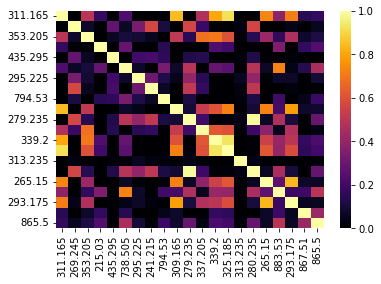

In [9]:
sns_heatmap(trainDEFSDf.corr())

In [10]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5.2, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
mz_corr(trainDEFSDf, "trainDEFSDf")

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,279.235,337.205,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5
311.165,NaN,0.222523,0.494599,0.170179,0.140783,0.227762,0.070761,0.256984,0.029374,0.844538,0.006403,0.469305,0.807824,0.919210,0.003229,0.002465,0.733084,0.386400,0.714471,0.142611,0.169985
269.245,NaN,NaN,0.075484,0.280786,0.280973,0.063760,0.333576,0.569605,0.108415,0.006372,0.565989,0.184845,0.231545,0.218016,0.029370,0.561483,0.065381,0.006540,0.041196,0.098979,0.056616
353.205,NaN,NaN,NaN,0.023693,0.061037,0.103162,0.091278,0.053441,0.005664,0.510212,0.144746,0.681425,0.701719,0.597975,0.010052,0.140071,0.416319,0.160850,0.468299,0.076224,0.118010
215.03,NaN,NaN,NaN,NaN,0.106283,0.283943,0.135334,0.294808,0.143190,0.024640,0.120651,0.152658,0.231964,0.200981,0.008914,0.121087,0.004630,0.351562,0.076180,0.164811,0.240200
435.295,NaN,NaN,NaN,NaN,NaN,0.018297,0.199511,0.214541,0.158085,0.009505,0.127535,0.134203,0.134744,0.129944,0.019413,0.127501,0.061796,0.149876,0.012932,0.076500,0.061991
738.505,NaN,NaN,NaN,NaN,NaN,NaN,0.074129,0.001779,0.334729,0.074773,0.489756,0.011413,0.282618,0.258829,0.015719,0.484881,0.068317,0.725429,0.040414,0.134637,0.455391
295.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.306373,0.122674,0.043035,0.399598,0.144636,0.072152,0.063757,0.057981,0.394601,0.012122,0.075544,0.067205,0.038262,0.097233
241.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062574,0.025636,0.510108,0.167346,0.270810,0.256933,0.030401,0.504850,0.083678,0.047936,0.026054,0.112701,0.011727
794.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040715,0.115564,0.007529,0.008476,0.014946,0.020760,0.115287,0.061541,0.195734,0.033886,0.046370,0.183021
309.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096693,0.524580,0.602862,0.721707,0.005615,0.093236,0.726477,0.214110,0.787832,0.075278,0.079434


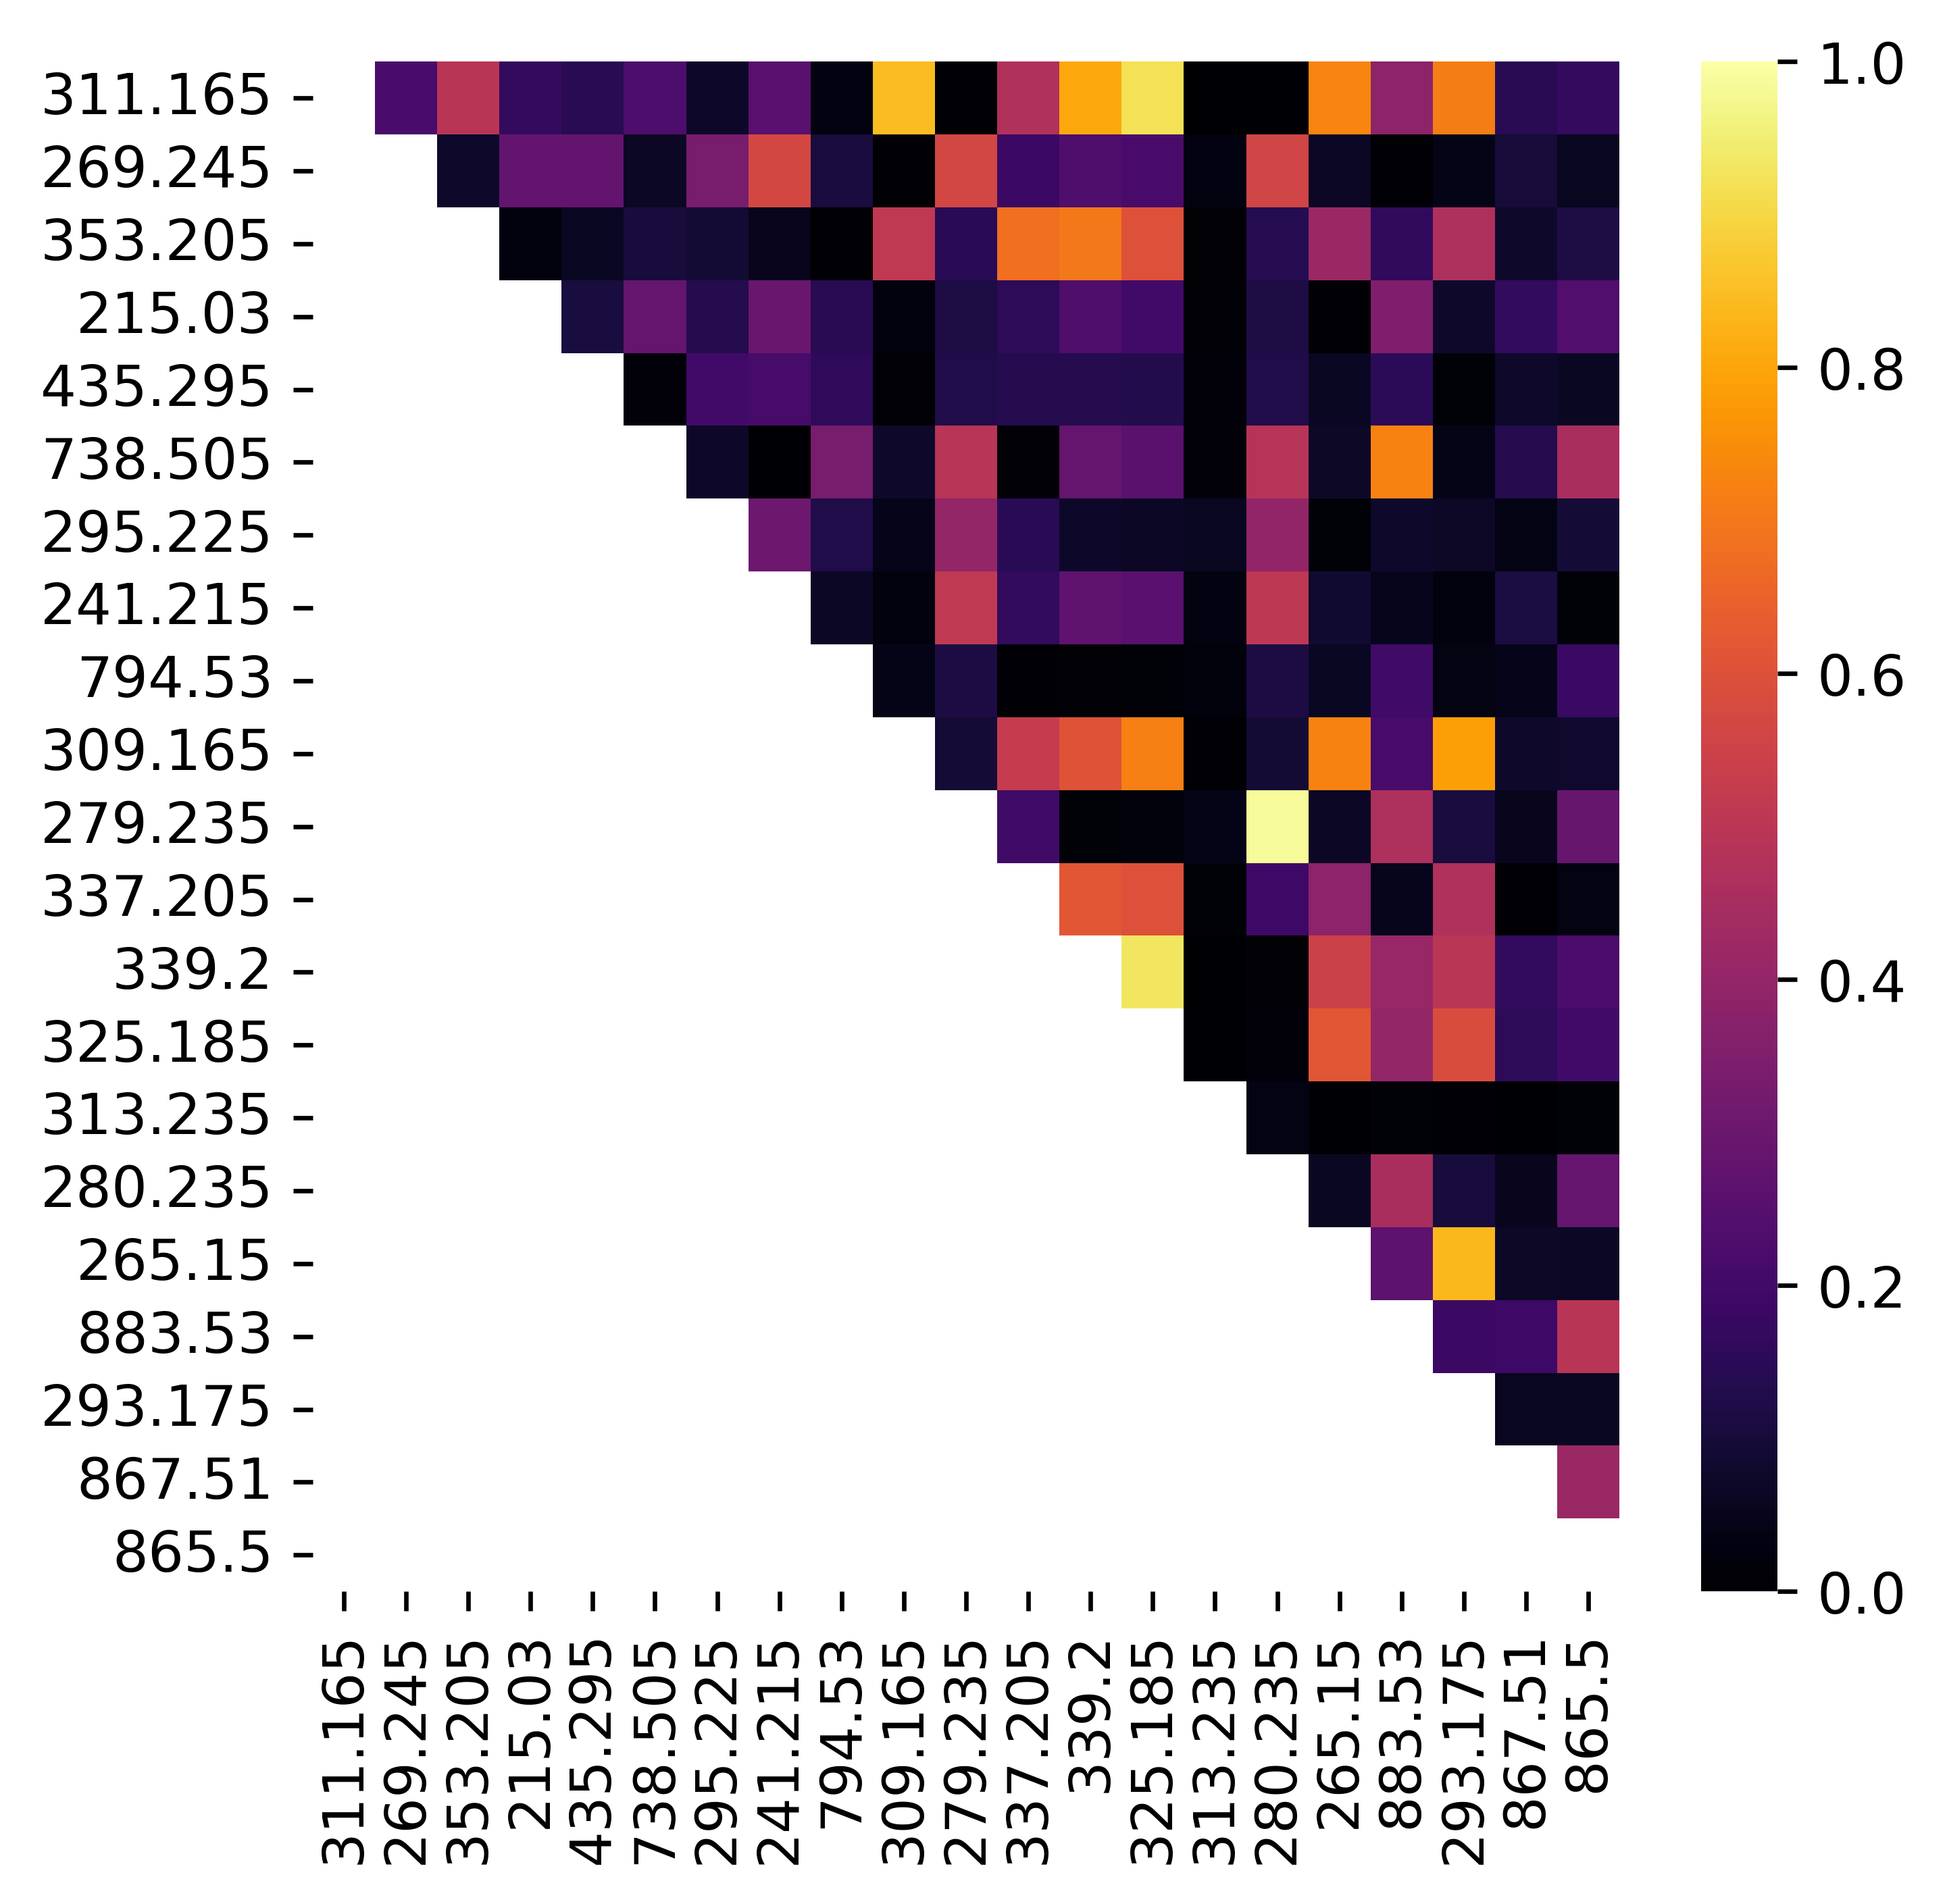

In [13]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

In [14]:
mz_corr(extDEFSDf, "extDEFSDf")

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,279.235,337.205,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5
311.165,NaN,0.496824,0.314752,0.168860,0.202262,0.369811,0.393006,0.539550,0.290135,0.403666,0.430787,0.068767,0.855630,0.964504,0.345352,0.429352,0.553440,0.462748,0.468624,0.489573,0.479309
269.245,NaN,NaN,0.642049,0.038475,0.693806,0.772626,0.890625,0.965879,0.673718,0.473639,0.960436,0.018772,0.724072,0.586149,0.802696,0.959735,0.404572,0.846992,0.324315,0.734328,0.775231
353.205,NaN,NaN,NaN,0.078228,0.547374,0.434200,0.643833,0.621743,0.446204,0.372394,0.690457,0.098621,0.416345,0.356693,0.589341,0.690898,0.283448,0.509072,0.230084,0.379813,0.425830
215.03,NaN,NaN,NaN,NaN,0.584684,0.193839,0.144982,0.000438,0.338036,0.097888,0.139921,0.009550,0.218652,0.202532,0.099897,0.140227,0.257351,0.103329,0.162693,0.097671,0.051512
435.295,NaN,NaN,NaN,NaN,NaN,0.687578,0.772269,0.681270,0.659671,0.214301,0.759935,0.005219,0.309657,0.236072,0.683027,0.759020,0.085061,0.643099,0.082526,0.516765,0.511167
738.505,NaN,NaN,NaN,NaN,NaN,NaN,0.781095,0.828958,0.775706,0.341226,0.713999,0.005278,0.521857,0.425065,0.756460,0.711912,0.239002,0.763081,0.196193,0.551388,0.540995
295.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895478,0.727724,0.346856,0.923887,0.009609,0.572664,0.461229,0.894174,0.922366,0.280433,0.696961,0.235002,0.513932,0.550113
241.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690234,0.486686,0.921133,0.024192,0.742264,0.623297,0.822150,0.919860,0.430372,0.855113,0.348560,0.719872,0.749037
794.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260710,0.680930,0.022224,0.367545,0.316187,0.724332,0.679643,0.068793,0.574778,0.098368,0.415236,0.411404
309.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397555,0.171200,0.524815,0.459669,0.325555,0.397381,0.456446,0.498863,0.368368,0.464917,0.492251


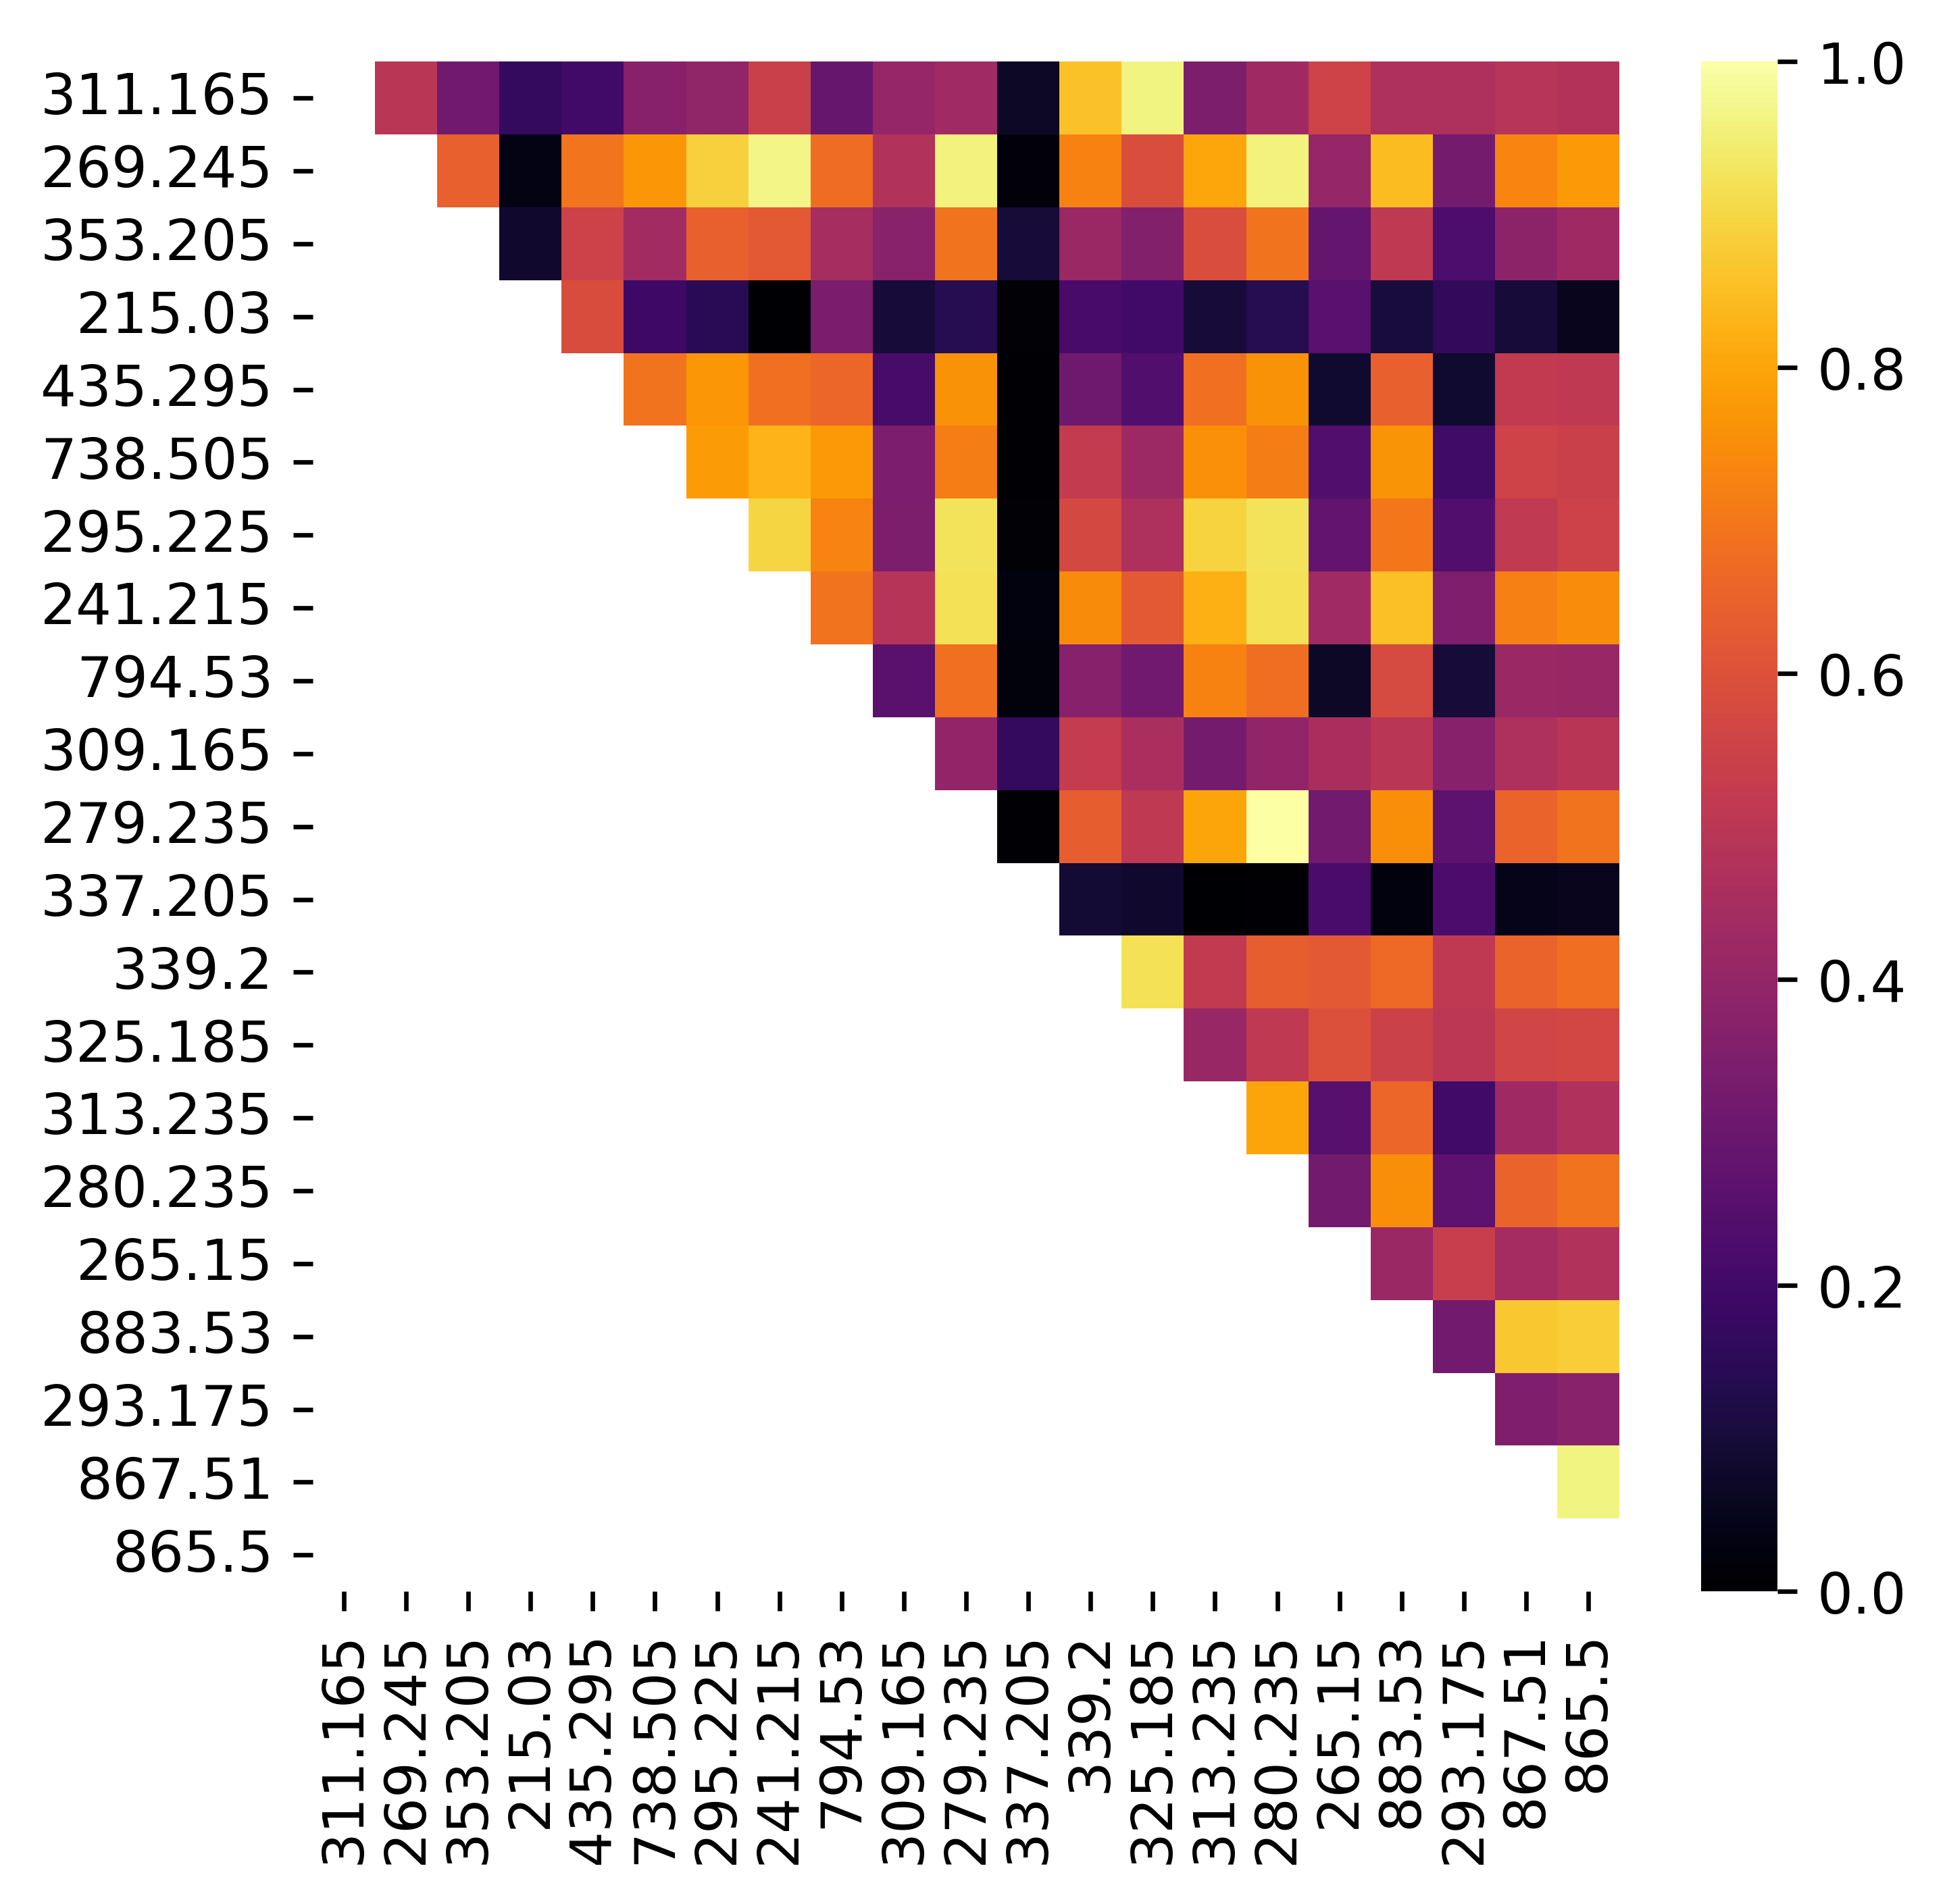

In [15]:
sns_heatmap(mz_corr(extDEFSDf, "extDEFSDf"))

In [16]:
mz_corr(fnaDEFSDf, "fnaDEFSDf")

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,279.235,337.205,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5
311.165,NaN,0.13812,0.527372,0.049949,0.098355,0.020103,0.079637,0.177433,0.096276,0.258702,0.084487,0.427851,0.523115,0.662099,0.027705,0.088566,0.662360,0.101315,0.151384,0.113067,0.175773
269.245,NaN,NaN,0.068503,0.502688,0.395691,0.202500,0.629498,0.430092,0.403622,0.343863,0.474044,0.066020,0.080265,0.108624,0.466608,0.455000,0.126000,0.296141,0.565685,0.047028,0.015362
353.205,NaN,NaN,NaN,0.008012,0.068569,0.014394,0.012362,0.102105,0.068001,0.242653,0.072916,0.588502,0.531772,0.561480,0.012971,0.080189,0.528097,0.033313,0.126745,0.075620,0.101993
215.03,NaN,NaN,NaN,NaN,0.628592,0.438679,0.655720,0.181935,0.611519,0.296417,0.715197,0.015015,0.004090,0.028846,0.586583,0.695732,0.024292,0.489854,0.524736,0.085592,0.043827
435.295,NaN,NaN,NaN,NaN,NaN,0.362095,0.514547,0.140217,0.612694,0.251852,0.664672,0.033992,0.045606,0.089075,0.511039,0.645256,0.218814,0.298278,0.488152,0.200279,0.206683
738.505,NaN,NaN,NaN,NaN,NaN,NaN,0.289238,0.052156,0.414820,0.072223,0.621116,0.008833,0.006840,0.012356,0.240089,0.612270,0.058944,0.566521,0.151444,0.159898,0.329396
295.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363309,0.549233,0.367290,0.632717,0.023123,0.028716,0.041904,0.565676,0.614302,0.057391,0.343270,0.631027,0.078258,0.004572
241.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025090,0.209278,0.125449,0.091551,0.108418,0.144138,0.293850,0.114203,0.177141,0.242886,0.329915,0.063744,0.114767
794.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214293,0.774449,0.032320,0.037053,0.082599,0.420122,0.752082,0.208459,0.243917,0.469605,0.216509,0.194580
309.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254167,0.207223,0.205282,0.250896,0.293939,0.241786,0.240265,0.108004,0.611377,0.061026,0.052884


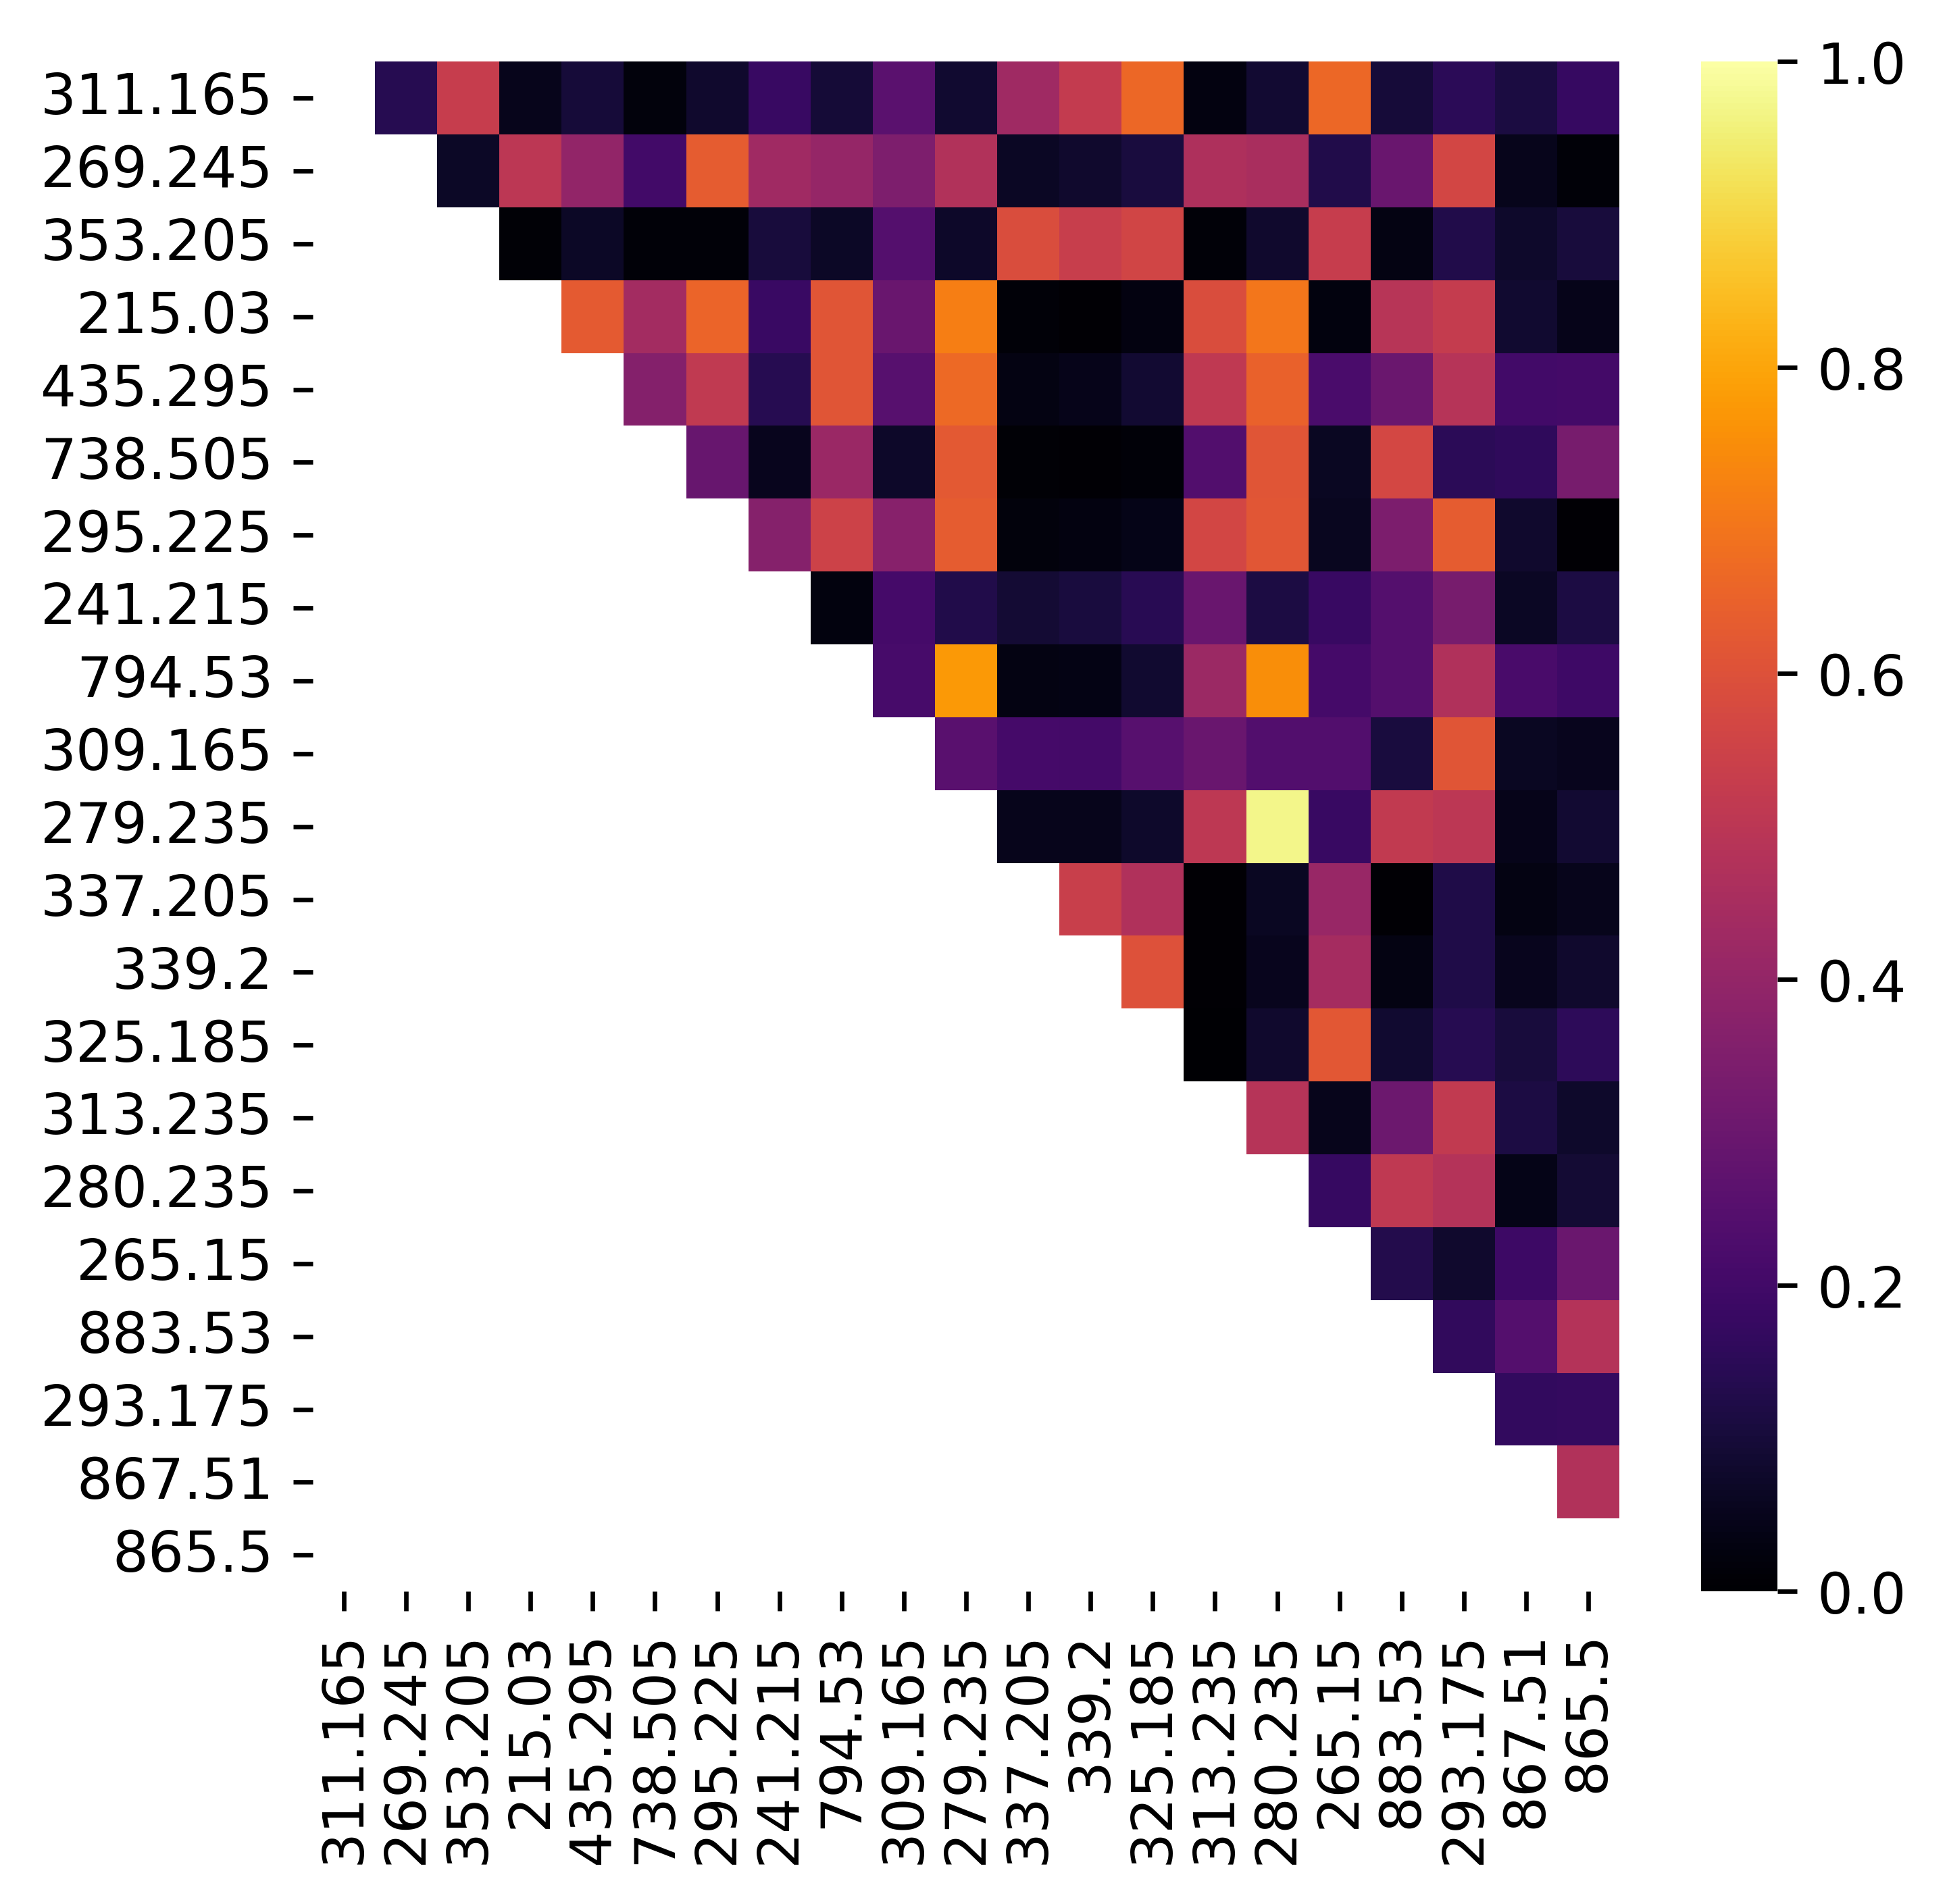

In [17]:
sns_heatmap(mz_corr(fnaDEFSDf, "fnaDEFSDf"))

In [18]:
mz_corr(ingestedDEFSDf, "ingestedDEFSDf")

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,279.235,337.205,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5
311.165,NaN,0.123644,0.487963,0.104959,0.126491,0.226584,0.010831,0.159063,0.001537,0.836170,0.041493,0.463059,0.807879,0.919769,0.034706,0.038807,0.731096,0.288486,0.709982,0.107582,0.144490
269.245,NaN,NaN,0.036443,0.065133,0.273078,0.164452,0.674916,0.773047,0.539094,0.020001,0.747121,0.072298,0.136833,0.118465,0.618848,0.741295,0.029050,0.499808,0.025805,0.519861,0.511630
353.205,NaN,NaN,NaN,0.039267,0.082350,0.116390,0.059036,0.011125,0.029801,0.510599,0.119961,0.676896,0.695327,0.590350,0.009220,0.119517,0.411703,0.093858,0.464631,0.003398,0.049989
215.03,NaN,NaN,NaN,NaN,0.047581,0.228311,0.173499,0.048189,0.362513,0.045836,0.139512,0.133770,0.130032,0.120054,0.244972,0.134655,0.017432,0.364254,0.076321,0.317925,0.313848
435.295,NaN,NaN,NaN,NaN,NaN,0.056559,0.250863,0.214702,0.178782,0.001052,0.232854,0.127778,0.116054,0.114519,0.158082,0.233324,0.056413,0.004396,0.015652,0.029215,0.024609
738.505,NaN,NaN,NaN,NaN,NaN,NaN,0.210366,0.103461,0.324981,0.082398,0.454876,0.009600,0.284255,0.258337,0.211020,0.455541,0.071047,0.599415,0.045938,0.163779,0.380446
295.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.632581,0.570853,0.013361,0.734387,0.035586,0.015960,0.003973,0.736233,0.726748,0.022680,0.529617,0.039184,0.507323,0.495574
241.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.509232,0.040156,0.669712,0.063547,0.180505,0.158478,0.580538,0.663184,0.046905,0.444878,0.012610,0.494567,0.467664
794.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056200,0.492301,0.056792,0.002729,0.008572,0.625255,0.484447,0.035801,0.548711,0.038758,0.549654,0.529454
309.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063738,0.524333,0.601918,0.716241,0.011570,0.063289,0.721671,0.135868,0.781627,0.015936,0.038843


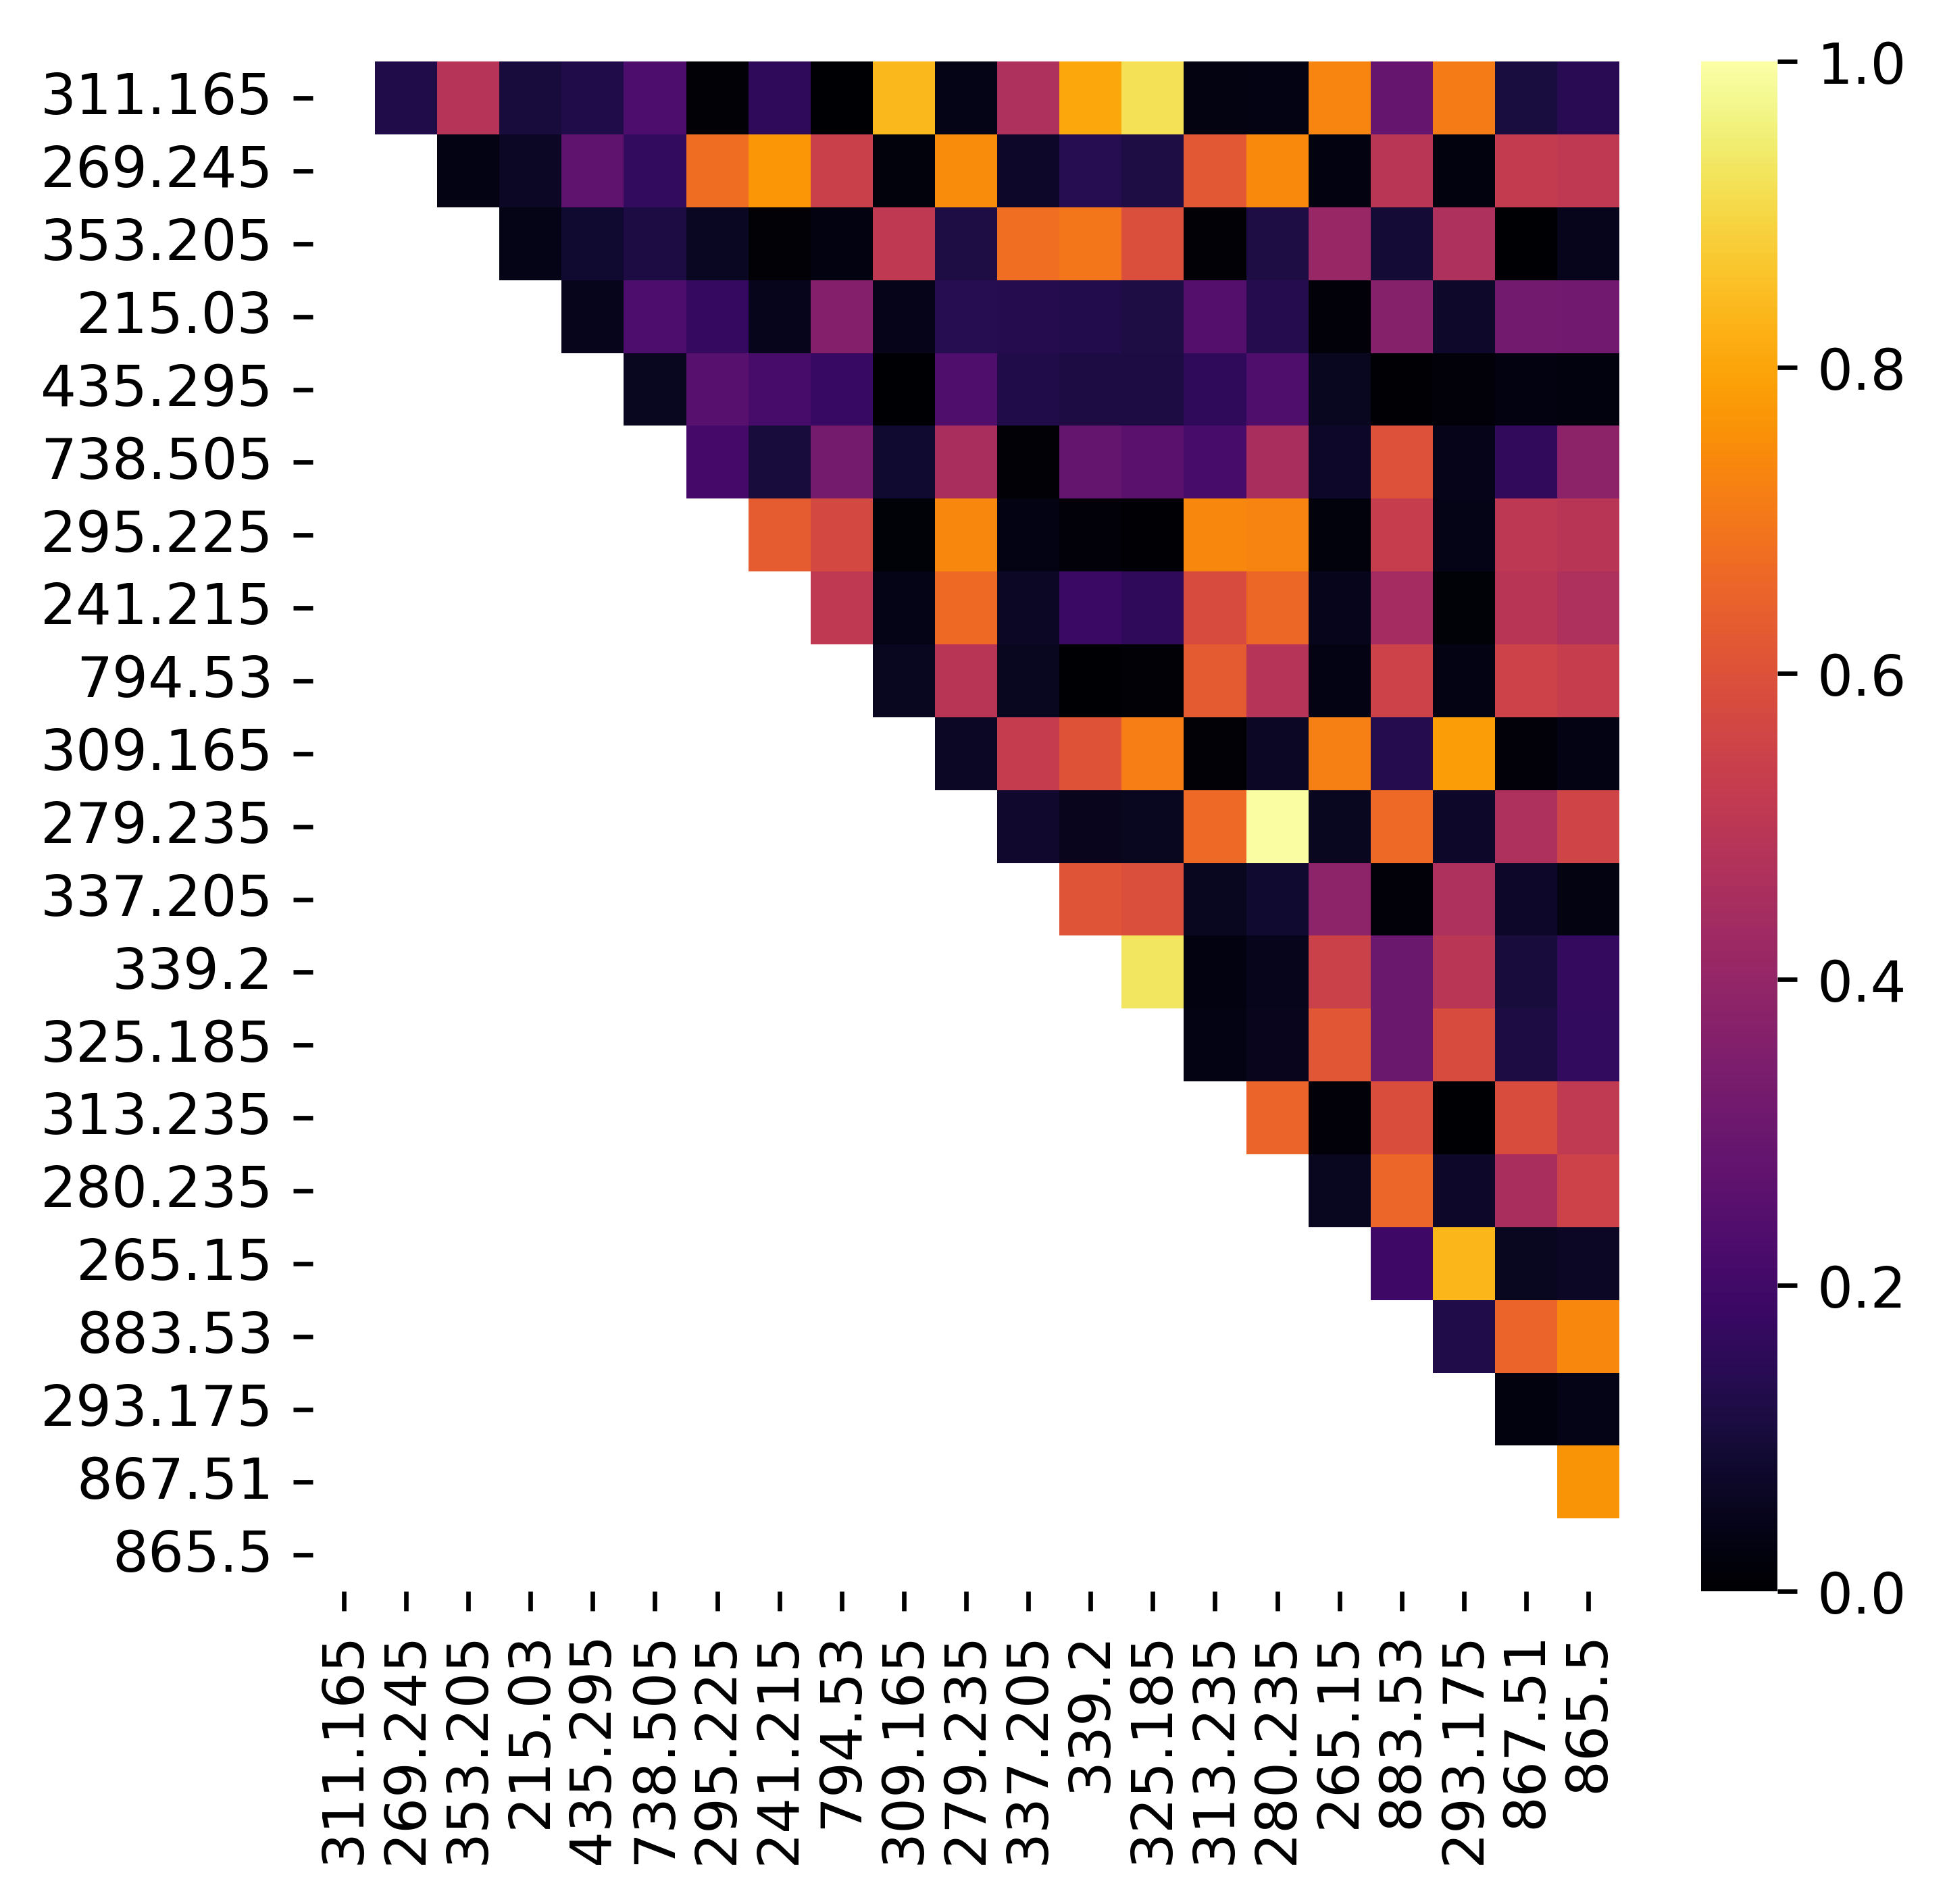

In [19]:
sns_heatmap(mz_corr(ingestedDEFSDf, "ingestedDEFSDf"))

In [20]:
mz_corr(diDEFSDf, "diDEFSDf")

,311.165,269.245,353.205,215.03,435.295,738.505,295.225,241.215,794.53,309.165,279.235,337.205,339.2,325.185,313.235,280.235,265.15,883.53,293.175,867.51,865.5
311.165,NaN,0.406797,0.660999,0.035410,0.424454,0.245541,0.173146,0.389113,0.011071,0.441861,0.360483,0.478448,0.915769,0.978376,0.147303,0.353873,0.429601,0.256632,0.483338,0.197149,0.123338
269.245,NaN,NaN,0.696438,0.161036,0.442076,0.447781,0.520675,0.830376,0.140647,0.623300,0.524192,0.695204,0.600484,0.512625,0.352443,0.515840,0.567811,0.221622,0.702690,0.006115,0.036564
353.205,NaN,NaN,NaN,0.035518,0.416549,0.454142,0.358533,0.693130,0.000605,0.912190,0.497746,0.898632,0.828512,0.759135,0.185984,0.491675,0.880777,0.343493,0.929068,0.019424,0.097056
215.03,NaN,NaN,NaN,NaN,0.181691,0.265191,0.149507,0.110967,0.452575,0.051906,0.062499,0.006803,0.056843,0.047074,0.086257,0.059468,0.079977,0.181624,0.012028,0.140203,0.150596
435.295,NaN,NaN,NaN,NaN,NaN,0.224012,0.266096,0.523595,0.064958,0.333171,0.267526,0.385344,0.453026,0.443347,0.232466,0.255484,0.350585,0.240847,0.386488,0.221661,0.221791
738.505,NaN,NaN,NaN,NaN,NaN,NaN,0.049074,0.381100,0.475368,0.493262,0.277993,0.544278,0.418557,0.329623,0.125725,0.277565,0.388912,0.651256,0.504252,0.343698,0.431386
295.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443315,0.032787,0.354165,0.703037,0.340611,0.326870,0.247310,0.738816,0.693950,0.414578,0.025045,0.381014,0.031713,0.010500
241.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141318,0.619224,0.470161,0.698545,0.575870,0.491638,0.356660,0.462535,0.581407,0.218050,0.705525,0.036758,0.059684
794.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015178,0.118450,0.055818,0.076509,0.041855,0.021775,0.115584,0.080039,0.301145,0.023143,0.292512,0.327946
309.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.537525,0.918558,0.667235,0.563807,0.068582,0.534059,0.966451,0.378746,0.965230,0.113405,0.186817


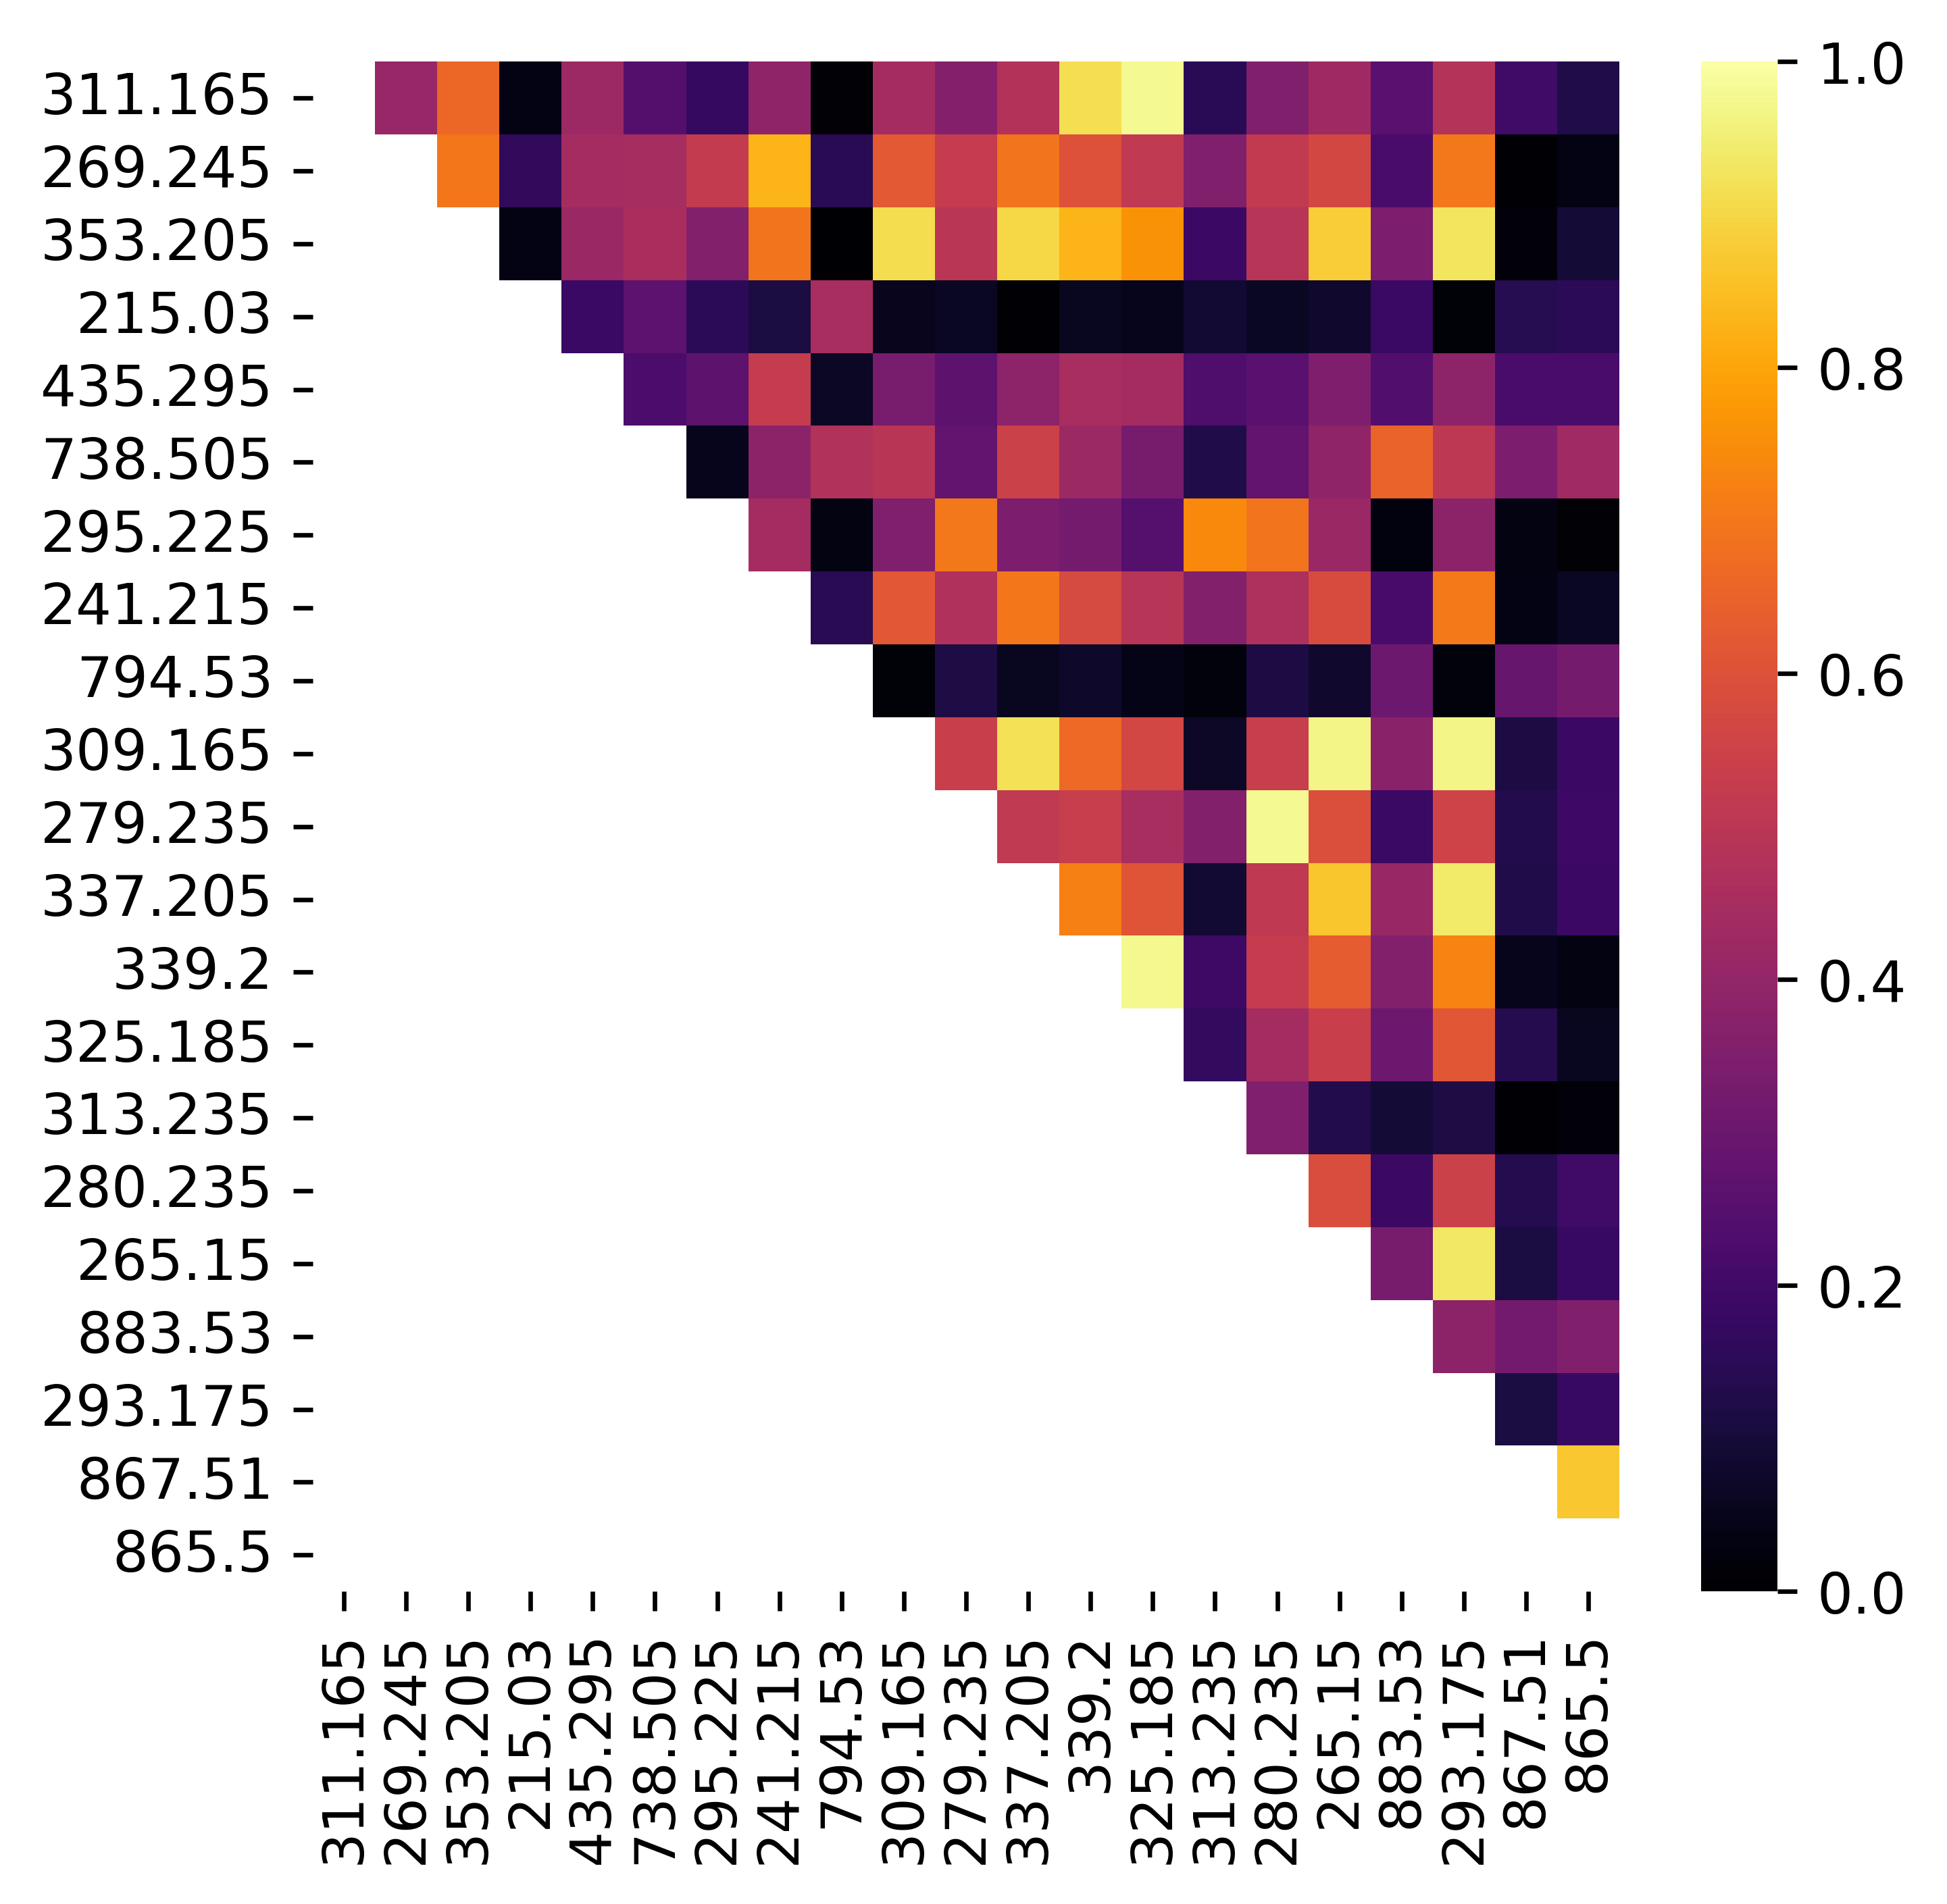

In [21]:
sns_heatmap(mz_corr(diDEFSDf, "diDEFSDf"))